**<hr>**

# <center>**PROMO TOOL**<br>prototype</center>

**<hr>**

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

import sys

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm

import datetime
from dateutil.parser import *

from sklearn.linear_model import SGDRegressor


from sklearn.pipeline import Pipeline
from transformers import dayName, dummy_days, DFStandardScaler, ZeroFillTransformer, DFFeatureUnion

import pickle

<hr>

In [89]:
print (X_41_train.shape, y_41_train.shape)
print (X_41_test.shape, y_41_test.shape)

(593, 10) (593,)
(116, 10) (116,)


# 0. **PREPROCESSING**

## 0.1. Auxiliary functions and lists

### 0.1.1. Handling outliers

In this notebook we are dealing with outliers by conducting cross validation:
* remove outliers that are over 95 percentile
* remove outliers that are over 975 percentile
* remove outliers that are over 99 percentile

In [2]:
def removing_outliers(self):
    upper_lim1 = self['amount'].quantile(.95)
    lower_lim1 = self['amount'].quantile(.05)
    self=self[(self['amount'] < upper_lim1) & (self['amount'] > lower_lim1)]
    
    upper_lim2 = self['amount'].quantile(.975)
    lower_lim2 = self['amount'].quantile(.025)
    self=self[(self['amount'] < upper_lim2) & (self['amount'] > lower_lim2)]
    
    upper_lim3 = self['amount'].quantile(.99)
    lower_lim3 = self['amount'].quantile(.01)
    self=self[(self['amount'] < upper_lim3) & (self['amount'] > lower_lim3)]    
    
    return self

### 0.1.2. Separating training and test data

In [3]:
def test_train_separation (self):
    
    aux = self.loc[self.index.get_level_values('date') <= '2018-01-01']
    train_X = aux.drop('amount',axis=1)
    train_y = aux['amount']
    
    aux = self.loc[self.index.get_level_values('date') > '2018-01-01']
    test_X = aux.drop('amount',axis=1)
    test_y = aux['amount']
    
    return train_X, test_X, train_y, test_y

### 0.1.3. Function and list initialization

In [4]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
std_scaler = StandardScaler()
lm = linear_model.LinearRegression()

In [10]:
list_of_items = [38,39,40,41,57] 

In [5]:
rmse_train = []
rmse_test = []
r2 = []

In [6]:
categorical_features = ['day_of_week']
numerical_features = ['regular_price', 'discounted_price','number_of_stores']

## 0.2. Pipeline

Process:
   * separate dependent array _"amount"_ and _the rest of dataframe_ from the initial dataframe
   * separate data into train and test set
   * fit model on train set
   * transform both train and test set

Defining pipeline with following transformers: DFFeatureUnion, DFStandardScaler, dayName, dummy_days:

In [13]:
#pipeline = Pipeline([ ('features', DFFeatureUnion([       
 #                                                     ('categoricals', Pipeline([ ('dani',dayName()), ('dummyD', dummy_days())]))
 #                                                 ])), 
  #                    ('scaler', DFStandardScaler()) 
   #                ])

Saving pipeline to pipeline_picikle:

In [14]:
#pipeline_pickle_path = 'pipeline_pickle.pkl'
#pipeline_pickle = open (pipeline_pickle_path,'wb')
#pickle.dump(pipeline, pipeline_pickle)
#pipeline_pickle.close()

## 0.3. Data loading

In [17]:
X = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/radni_folder/parquet/X_prices_stores_amount.parquet")

In [18]:
X_38 = X.loc[38]
X_39 = X.loc[39]
X_40 = X.loc[40]
X_41 = X.loc[41]
X_57 = X.loc[57]

**<hr>**

# <center>**ITEMS**</center>

**<hr>**

# 1. ITEM 38

In [19]:
X_38.head()

,regular_price,discounted_price,number_of_stores,amount
date,,,,
2016-01-02,0.1,0.1,439,769.0
2016-01-03,0.1,0.1,436,100.0
2016-01-04,0.1,0.1,441,305.0
2016-01-05,0.1,0.1,441,79.0
2016-01-06,0.1,0.1,444,344.0


## 1.1. Data preprocessing

### 1.1.1. Removing outliers

In [20]:
X_38 = removing_outliers(X_38)

### 1.1.2. Separating data into training and test set

In [21]:
X_38_train, X_38_test, y_38_train, y_38_test =  test_train_separation(X_38)

In [22]:
#X_38_train.to_parquet('X_38_train.parquet')
#X_38_test.to_parquet('X_38_test.parquet')

### 1.1.3. Pipeline

In [23]:
X_38_train = pipeline_from_pickle.fit_transform(X_38_train)
X_38_test = pipeline_from_pickle.transform(X_38_test)

In [24]:
print (X_38_train.shape, y_38_train.shape)
print (X_38_test.shape, y_38_test.shape)

(570, 10) (570,)
(109, 10) (109,)


## 1.2. Fitting and transforming

### 1.2.1. Training set

In [25]:
model_38 = lm.fit(X_38_train, y_38_train)

In [26]:
y_38_train_predicted = model_38.predict(X_38_train)

In [27]:
model_38.score(X_38_train,y_38_train)

0.16219308231894247

In [28]:
mae_38_train = mean_absolute_error(y_38_train, y_38_train_predicted)
mae_38_train

83.72655487973722

In [29]:
mse_38_train = mean_squared_error(y_38_train, y_38_train_predicted)
mse_38_train

10476.359990503172

In [30]:
rmse_38_train = np.sqrt(mean_squared_error(y_38_train, y_38_train_predicted))
rmse_train.append(rmse_38_train)
rmse_38_train

102.35409122503688

### 1.2.2. Test set

In [31]:
y_38_test_predicted = model_38.predict(X_38_test)

In [32]:
mae_38_test = mean_absolute_error(y_38_test, y_38_test_predicted)
mae_38_test

85.5111689078675

In [33]:
mse_38_test = mean_squared_error(y_38_test, y_38_test_predicted)
mse_38_test

10632.707392944762

Text(0, 0.5, 'predicted amount sold')

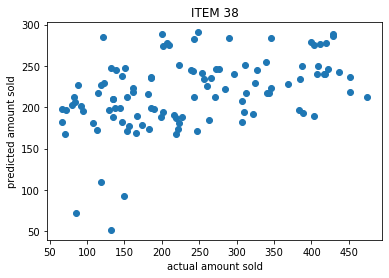

In [34]:
plt.scatter(y_38_test, y_38_test_predicted)
plt.title("ITEM 38")
plt.xlabel("actual amount sold")
plt.ylabel("predicted amount sold")

## 1.3. Error metrics

In [35]:
r2_score(y_38_test,y_38_test_predicted)

0.14843820292262166

In [36]:
r2.append(r2_score(y_38_test,y_38_test_predicted))

In [37]:
rmse_38_test = np.sqrt(mean_squared_error(y_38_test, y_38_test_predicted))
rmse_test.append(rmse_38_test)
rmse_38_test

103.11502021017482